## Metody Optymalizacji z ograniczeniami

### Metoda rzutu gradientu

Metoda rzutu gradientu jest modyfikacją metody gradientu prostego. Służy do optymalizacji z ograniczeniami nierównościowymi afinicznymi.

Mamy zadanie minimalizacji $f(x)$, $x\in \mathbb{R}^n$ przy ograniczeniach $Ax\leq b$, A jest macierzą m na n, $b \in mathbb{R}^m$.

1. Zaczynamy od punktu dopuszczalnego $x_0$. $n=0$
2. Jeżeli nie mamy żadnych ograniczeń aktywnych, to wykonujemy krok metody gradientowego spadku.
3. W przeciwnym wypadku dokonujemy rzutowania gradientu:
$$ d_n := (I-A_iA_i^+)\nabla f(x_n) $$
Gdzie $A_i$ - to macierz A z wierszami dotyczącymi ograniczeń aktywnych, $A^+$ to tzw. pseudoodwrotność macierzy A, czyli $A^+:=A(A^TA)^{-1}A^T$
I wykonujemy krok w przeciwnym kierunku do zrzutowanego gradientu:
$$ x_{n+1} := x_n - \alpha d_n $$
4. Jeżeli w wyniku kroku opuściliśmy obszar rozwiązań dopuszczalnych, to cofamy się do poprzedniego $x_n$ i wykonujemy krok o mniejsze $\alpha$ tak, aby co najwyżej aktywować ograniczenie (można wykorzystać wzór na odległość przecięcia prostej z płaszczyzną [https://en.wikipedia.org/wiki/Line%E2%80%93plane_intersection#Algebraic_form](https://en.wikipedia.org/wiki/Line%E2%80%93plane_intersection#Algebraic_form)).
5. n:=n+1
6. Jeżeli liczba iteracji jest mniejsza od założonej, to wróć do 2.

### Zadanie 1 (3 pkt)
Zastosuj ten algorytm do minimalizacji funkcji $ f(x,y)=-(2+x)^{2}-2y^2 $ na trójkącie o wierzchołkach (-1,0), (1,0) i (-1,-1).

In [76]:
from autograd import grad
from autograd import numpy as np
import matplotlib.pyplot as plt

In [319]:
def function(x):
    return -(2 + x[0]) ** 2 - 2 * x[1] ** 2

## PISZ TUTAJ

[-1.  2.]
[-1.  2.]


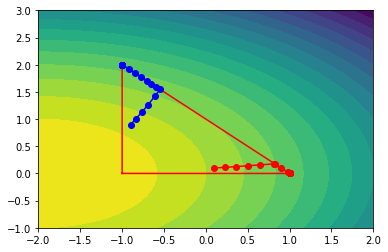

In [320]:
x = np.linspace(-2,2,100)
y = np.linspace(-1,3,100)
xx,yy = np.meshgrid(x,y)
z = function(np.array([xx,yy]))
plt.contourf(xx,yy,z, levels=20)
plt.plot([-1,1,-1, -1],[0,0,2,0], c='r')
plt.plot(history[:-2,0],history[:-2,1], '-o', c='b')
plt.plot(history2[:-2,0],history2[:-2,1], '-o', c='r')

## Zadanie 2 - Optymalizacja rozmiarów haka (3 pkt)

Załóżmy, że mamy hak, który ma wytrzymać obciążenie wywoływane przez ciężar ciała w wysokości $F=100N$ zawieszone jak na rysunku. Hak jest wykonany z pierścienia o promieniu wewnętrznym $r_i > 1.5 mm$ oraz promieniu zewnętrznym $r_o$, a jego grubość wynosi co najmniej $b > 0.2mm$.

![](hook.png)

Neutralny promień haka definiujemy następująco:

$$r_n = \frac{r_o-r_i}{\ln{\frac{r_o}{r_i}}}$$

Średni promień $R$ jest średnią arytmetyczną $r_i$ oraz $r_o$. Naprężenie w punkcie A możemy wyznaczyć z zależności:

$$ \sigma_A=\frac{FR(r_o-r_n)}{b(r_o-r_i)er_o} $$

A w punkcie B z zależności:

$$ \sigma_B=\frac{FR(r_n-r_i)}{b(r_o-r_i)er_i} $$

gdzie $e=R-r_n$, a naprężenie w tych punktach nie może przekroczyć $430\frac{N}{mm^2}$. Wyznacz za pomocą metody minimize z pakietu scipy.optimize takie wymiary haka ($r_0$, $r_i$ oraz $b$) aby ilość materiału potrzebnego do wykonania go (objętość) była jak najmniejsza.

Do znajdowania minimum funkcji z ograniczeniami (constraint oraz bounds) służy metoda Sequential Quadratic Programming (zwana w pakiecie scipy Sequential Least Square Quadratic Programming - "SLSQP"), o której więcej można przeczytać w [https://www.math.uh.edu/~rohop/fall_06/Chapter4.pdf](https://www.math.uh.edu/~rohop/fall_06/Chapter4.pdf). Omówienie tej metody wykracza poza zakres tego przedmiotu.

In [4]:
from scipy import optimize

In [48]:
## PISZ TUTAJ

r_o =  3.3893429231291727 , r_i =  1.5 , b =  1.292232101486737
